<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/ExamplesDS/blob/main/CatBoostRegressor_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data download

https://drive.google.com/file/d/1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc/view?usp=sharing

In [1]:
! gdown 1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc

Downloading...
From: https://drive.google.com/uc?id=1hj_NWyQ3yMDT02RUuqV194gV2KBHnUIc
To: /content/UK-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 136MB/s]


In [2]:
! unzip /content/UK-used-cars.zip -d /content/UK-used-cars

Archive:  /content/UK-used-cars.zip
  inflating: /content/UK-used-cars/audi.csv  
  inflating: /content/UK-used-cars/bmw.csv  
  inflating: /content/UK-used-cars/cclass.csv  
  inflating: /content/UK-used-cars/focus.csv  
  inflating: /content/UK-used-cars/ford.csv  
  inflating: /content/UK-used-cars/hyundi.csv  
  inflating: /content/UK-used-cars/merc.csv  
  inflating: /content/UK-used-cars/skoda.csv  
  inflating: /content/UK-used-cars/toyota.csv  
  inflating: /content/UK-used-cars/unclean cclass.csv  
  inflating: /content/UK-used-cars/unclean focus.csv  
  inflating: /content/UK-used-cars/vauxhall.csv  
  inflating: /content/UK-used-cars/vw.csv  


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/UK-used-cars/bmw.csv')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# Обучающая и тестовая выборка train&test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, train_size = 0.6, random_state=42)

In [8]:
print('df_len = ', len(df))
print('train_len = ', len(train))
print('test_len = ', len(test))

df_len =  10781
train_len =  6468
test_len =  4313


# Валидационная выборка 60/20/20

In [9]:
val, test = train_test_split(test, train_size = 0.5, random_state=42)


# One-Hot Encoding

In [10]:
pd.get_dummies(train['transmission'])

,Automatic,Manual,Semi-Auto
5133,0,0,1
2121,1,0,0
6576,0,0,1
8330,0,1,0
3161,0,0,1
...,...,...,...
5734,0,0,1
5191,0,0,1
5390,0,0,1
860,0,0,1


In [11]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from catboost import CatBoostRegressor
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [13]:
# посмотрим кто победит: человек или машина?
# обучимся только на фичах из человеческого обучения
model = CatBoostRegressor(cat_features = ['transmission'], eval_metric='MAPE')
model.fit(train[['year', 'engineSize', 'transmission']], train['price'],
          eval_set=(val[['year', 'engineSize', 'transmission']],val['price']), verbose=False )

In [14]:
# bestIteration - точка переобучения

# Предикт на тесте

In [15]:
model.predict(test[['year', 'engineSize', 'transmission']])

array([45367.67756432, 21884.38898346, 16091.74678864, ...,
       28392.87755636, 16091.74678864, 27668.06069946])

In [16]:
test['price_pred'] = model.predict(test[['year', 'engineSize', 'transmission']])
 

In [17]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45367.677564
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21884.388983
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16091.746789
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32231.178149
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32231.178149
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19305.028412
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,43991.055403
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28392.877556
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16091.746789


In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
def print_errors(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [19]:
print_errors(test['price'], test['price_pred'])

3345.7246072100406
0.15166607293455014


# Обучение на всех фичах

In [20]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5133,X6,2015,25000,Semi-Auto,26100,Diesel,205,45.6,3.0
2121,X2,2019,31980,Automatic,4804,Petrol,145,34.0,2.0
6576,X2,2018,22995,Semi-Auto,24136,Petrol,145,38.7,2.0
8330,3 Series,2016,12999,Manual,52224,Diesel,125,62.8,2.0
3161,X3,2019,32980,Semi-Auto,1961,Diesel,150,54.3,2.0
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


In [21]:
y = ['price']
X = train.columns.drop(y)
cat_features = ['model', 'transmission', 'fuelType']

In [22]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.075, # скорость обучения
              'early_stopping_rounds': 200, # если 200 итераций качество не растет, остановка
              'verbose': 100, # вывод каждые 100 итераций
              'random_seed': 42}

In [23]:
model = CatBoostRegressor(**parameters)

In [24]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.4582738	test: 0.4539380	best: 0.4539380 (0)	total: 8.14ms	remaining: 8.13s
100:	learn: 0.0876480	test: 0.0862924	best: 0.0862924 (100)	total: 633ms	remaining: 5.63s
200:	learn: 0.0773759	test: 0.0790647	best: 0.0790404 (198)	total: 1.44s	remaining: 5.73s
300:	learn: 0.0719070	test: 0.0753211	best: 0.0753211 (300)	total: 2.08s	remaining: 4.82s
400:	learn: 0.0687633	test: 0.0735751	best: 0.0735751 (400)	total: 2.75s	remaining: 4.1s
500:	learn: 0.0664724	test: 0.0725579	best: 0.0725579 (500)	total: 3.53s	remaining: 3.51s
600:	learn: 0.0645872	test: 0.0717504	best: 0.0717504 (600)	total: 4.18s	remaining: 2.77s
700:	learn: 0.0627572	test: 0.0710084	best: 0.0710084 (700)	total: 4.84s	remaining: 2.06s
800:	learn: 0.0613750	test: 0.0704878	best: 0.0704878 (800)	total: 6.07s	remaining: 1.51s
900:	learn: 0.0599069	test: 0.0698996	best: 0.0698936 (896)	total: 7.78s	remaining: 854ms
999:	learn: 0.0587290	test: 0.0697822	best: 0.0696893 (998)	total: 9.6s	remaining: 0us

bestTest = 0.069

In [25]:
test['price_pred_all'] = model.predict(test[X])

In [26]:
print_errors(test['price'], test['price_pred_all'])

1543.3661283838799
0.07306529063648863


# Обучаемся на всех данных - объединяем тренировочную и валидационную выборки

In [27]:
train_full = pd.concat([train, val])

In [28]:
model.best_iteration_+1

999

In [29]:
parameters = {'iterations': model.best_iteration_+1, # добавляем лучшую итерацию в параметры
              'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.075, # скорость обучения
              'early_stopping_rounds': 200, # если 200 итераций качество не растет, остановка
              'verbose': 100, # вывод каждые 100 итераций
              'random_seed': 42}

In [30]:
model = CatBoostRegressor(**parameters)

In [31]:
model.fit(train_full[X], train_full[y])

0:	learn: 0.4556513	total: 11.7ms	remaining: 11.6s
100:	learn: 0.0861526	total: 2.18s	remaining: 19.4s
200:	learn: 0.0749152	total: 3.96s	remaining: 15.7s
300:	learn: 0.0703071	total: 6.21s	remaining: 14.4s
400:	learn: 0.0676277	total: 8.6s	remaining: 12.8s
500:	learn: 0.0658318	total: 10.8s	remaining: 10.7s
600:	learn: 0.0641982	total: 12.9s	remaining: 8.57s
700:	learn: 0.0628874	total: 15.1s	remaining: 6.4s
800:	learn: 0.0614831	total: 16.8s	remaining: 4.14s
900:	learn: 0.0604901	total: 18.9s	remaining: 2.05s
998:	learn: 0.0596331	total: 21.3s	remaining: 0us


In [32]:
test['pred_full_price'] = model.predict(test[X])

In [33]:
print_errors(test['price'], test['pred_full_price'])

1493.2149517529472
0.07115506606935104


# Анализ ошибок модели
Какие факторы влияют на предсказания?

In [34]:
test['error'] = test['pred_full_price'] - test['price']

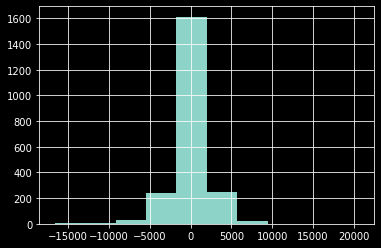

In [35]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
test['error'].hist()

In [36]:
test['error'].mean() # модель чуть завышает оценку

78.61510822030972

Абсолютная ошибка

In [37]:
test['error_abs'] = abs(test['error'])

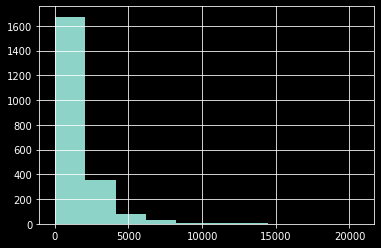

In [38]:
test['error_abs'].hist()

In [39]:
test['error_abs'].describe()

count     2157.000000
mean      1493.214952
std       1664.488800
min          0.181032
25%        477.164415
50%       1026.057275
75%       1890.897745
max      20649.201025
Name: error_abs, dtype: float64

In [40]:
# посмотрим на топ-10 машин, которые получили самую большую ошибку
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,pred_full_price,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32231.178149,32231.283474,32644.201025,20649.201025,20649.201025
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,32231.178149,31437.296159,30888.114137,-16661.885863,16661.885863
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,27668.060699,31302.083156,31073.083071,-13906.916929,13906.916929
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,32231.178149,29890.802992,28661.438536,-13833.561464,13833.561464
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,32231.178149,28194.237074,28702.280809,-13817.719191,13817.719191
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,72538.786735,84788.344530,83739.449338,12744.449338,12744.449338
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,43991.055403,47018.145998,46173.976945,-12488.023055,12488.023055
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,28392.877556,27228.118489,27117.463710,-11332.536290,11332.536290
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,50871.295228,49047.964490,48773.303064,-11225.696936,11225.696936
5281,5 Series,2019,39999,Semi-Auto,5877,Diesel,145,60.1,2.0,27668.060699,29561.391628,29622.406007,-10376.593993,10376.593993


In [41]:
# модель ошибается на новых дорогих автомобилях
# разобьем цену на равные по мощности группы
test['price_group'] = pd.qcut(test['price'], 5)

In [42]:
# построим сводник по цене и ошибке
test.groupby('price_group')[['error_abs', 'error']].agg(['count', 'mean'])

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   898.802072   435  423.203974
(13995.0, 18500.0]        432  1131.946226   432  304.590432
(18500.0, 23131.6]        427  1278.763262   427  189.771732
(23131.6, 29990.0]        432  1637.827204   432  276.004590
(29990.0, 74990.0]        431  2522.765001   431 -803.643896

In [43]:
t = test.groupby('price_group')[['error_abs', 'error']].agg(['count', 'mean'])

In [44]:
# избавляемся от мультииндекса
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [45]:
t = t.reset_index().drop('error_count', axis=1)

In [46]:
t

,price_group,error_abs_count,error_abs_mean,error_mean
0,"(1199.999, 13995.0]",435,898.802072,423.203974
1,"(13995.0, 18500.0]",432,1131.946226,304.590432
2,"(18500.0, 23131.6]",427,1278.763262,189.771732
3,"(23131.6, 29990.0]",432,1637.827204,276.004590
4,"(29990.0, 74990.0]",431,2522.765001,-803.643896


In [47]:
# разница со средней ошибкой
t['error_abs_mean'] - test['error_abs'].mean()

0    -594.412880
1    -361.268726
2    -214.451690
3     144.612252
4    1029.550049
Name: error_abs_mean, dtype: float64

In [48]:
t['mean_error_dif'] = t['error_abs_mean'] - test['error_abs'].mean()

In [49]:
t

,price_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif
0,"(1199.999, 13995.0]",435,898.802072,423.203974,-594.412880
1,"(13995.0, 18500.0]",432,1131.946226,304.590432,-361.268726
2,"(18500.0, 23131.6]",427,1278.763262,189.771732,-214.451690
3,"(23131.6, 29990.0]",432,1637.827204,276.004590,144.612252
4,"(29990.0, 74990.0]",431,2522.765001,-803.643896,1029.550049


In [50]:
# подкрасим ячейку с разностями градиентом
import seaborn as sns
cm = sns.dark_palette('green', as_cmap=True)
t.style.background_gradient(cmap=cm, subset=['mean_error_dif'])


,price_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif
0,"(1199.999, 13995.0]",435,898.802072,423.203974,-594.412880
1,"(13995.0, 18500.0]",432,1131.946226,304.590432,-361.268726
2,"(18500.0, 23131.6]",427,1278.763262,189.771732,-214.451690
3,"(23131.6, 29990.0]",432,1637.827204,276.004590,144.612252
4,"(29990.0, 74990.0]",431,2522.765001,-803.643896,1029.550049


In [51]:
# чем больше цена авто, тем больше отклонение от средней ошибки

Анализ абсолютной ошибки относительно остальных переменных

In [52]:
# например, года
# разобьем года на кастомные интервалы
pd.cut(test['year'], [0, 2000, 2010, 2018, float('inf')])

4984       (2018.0, inf]
4880    (2010.0, 2018.0]
9132    (2010.0, 2018.0]
6451       (2018.0, inf]
7199       (2018.0, inf]
              ...       
9627    (2010.0, 2018.0]
6096       (2018.0, inf]
1747       (2018.0, inf]
4023    (2010.0, 2018.0]
4372       (2018.0, inf]
Name: year, Length: 2157, dtype: category
Categories (4, interval[float64, right]): [(0.0, 2000.0] < (2000.0, 2010.0] < (2010.0, 2018.0] <
                                           (2018.0, inf]]

In [53]:
test['year_group'] = pd.cut(test['year'], [0, 2016, 2018, float('inf')])

In [54]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,pred_full_price,error,error_abs,price_group,year_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,45367.677564,57537.770269,56610.359887,3620.359887,3620.359887,"(29990.0, 74990.0]","(2018.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,21884.388983,22058.356272,22665.815037,-1415.184963,1415.184963,"(23131.6, 29990.0]","(2016.0, 2018.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,16091.746789,12987.073833,13151.585684,152.585684,152.585684,"(1199.999, 13995.0]","(0.0, 2016.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32231.178149,32231.283474,32644.201025,20649.201025,20649.201025,"(1199.999, 13995.0]","(2018.0, inf]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,32231.178149,34926.970922,34566.189256,4691.189256,4691.189256,"(23131.6, 29990.0]","(2018.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,19305.028412,14929.287819,14493.259321,-505.740679,505.740679,"(13995.0, 18500.0]","(0.0, 2016.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,43991.055403,30980.212866,30859.001264,1183.001264,1183.001264,"(23131.6, 29990.0]","(2018.0, inf]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,28392.877556,30178.143459,30173.640405,-396.359595,396.359595,"(29990.0, 74990.0]","(2018.0, inf]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,16091.746789,13886.157551,14019.735320,-979.264680,979.264680,"(13995.0, 18500.0]","(0.0, 2016.0]"


In [55]:
# построим сводник по группированному году и ошибке
t = test.groupby('year_group')['error_abs', 'error'].agg(['count', 'mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.reset_index().drop(['error_count'], axis=1)
t['mean_error_dif'] = t['error_abs_mean'] - test['error_abs'].mean()


In [56]:
t 

,year_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif
0,"(0.0, 2016.0]",777,1051.737938,88.843087,-441.477014
1,"(2016.0, 2018.0]",498,1283.866932,-55.449566,-209.348020
2,"(2018.0, inf]",882,2000.338482,145.301127,507.123531


In [57]:
# до 2018 модель предсказывает лучше среднего, на новых и дорогих машинах предсказывает хуже

In [58]:
# создадим функцию для анализа ошибки относительно следующей фичи
def display_error(col):
  t = test.groupby(col)['error_abs', 'error'].agg(['count', 'mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.reset_index().drop(['error_count'], axis=1)
  t['mean_error_dif'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  display(t.style.background_gradient(cmap=cm, subset=['mean_error_dif']))


In [59]:
display_error('year_group')

,year_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,"(0.0, 2016.0]",777,1051.737938,88.843087,-441.477014,1493.214952
1,"(2016.0, 2018.0]",498,1283.866932,-55.449566,-209.348020,1493.214952
2,"(2018.0, inf]",882,2000.338482,145.301127,507.123531,1493.214952


In [60]:
display_error('transmission') # модель ошибается на semi-auto коробке

,transmission,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,Automatic,695,1446.960174,-16.181503,-46.254777,1493.214952
1,Manual,504,1040.255148,70.079933,-452.959804,1493.214952
2,Semi-Auto,958,1765.071749,151.877502,271.856797,1493.214952


In [61]:
test['mileage_group'] = pd.qcut(test['mileage'], 5)

In [62]:
display_error('mileage_group') # чем меньше пробег=новее авто, тем больше ошибка

,mileage_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,"(0.999, 4063.2]",432,2312.510481,245.336996,819.295529,1493.214952
1,"(4063.2, 9825.4]",431,1706.938093,-8.354858,213.723142,1493.214952
2,"(9825.4, 24299.0]",432,1364.534955,25.002673,-128.679997,1493.214952
3,"(24299.0, 43519.8]",430,1146.234106,32.370155,-346.980846,1493.214952
4,"(43519.8, 190000.0]",432,934.745461,98.305159,-558.469491,1493.214952


In [63]:
display_error('fuelType') # на дизеле модель работает лучше


,fuelType,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,Diesel,1394,1403.053960,21.073132,-90.160992,1493.214952
1,Hybrid,64,1532.627257,-221.903259,39.412305,1493.214952
2,Other,5,1604.443462,-762.900375,111.228510,1493.214952
3,Petrol,694,1669.880503,227.972842,176.665551,1493.214952


In [64]:
# рассмотрим переменную налог
test['tax_group'] = pd.qcut(test['tax'], 5, duplicates='drop')

In [65]:
display_error('tax_group')
# в группе 125-145 больше всего машин и больше всего ошибка. Возможно, дорогие и новые машины тоже там

,tax_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,"(-0.001, 125.0]",512,831.127532,108.279851,-662.087419,1493.214952
1,"(125.0, 145.0]",1131,1753.174963,42.136736,259.960011,1493.214952
2,"(145.0, 150.0]",252,1679.403831,138.650971,186.188879,1493.214952
3,"(150.0, 580.0]",262,1485.788956,120.369512,-7.425996,1493.214952


In [66]:
# проверим правда ли
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])
# да, новые и дорогие машины попадают в этот промежуток налога

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

In [67]:
# идем дальше, к расхду - mpg
# это тоже непрерывная переменная, ее нужно вначале сгруппировать
test['mpg_group'] = pd.qcut(test['mpg'], 5, duplicates='drop')

In [68]:
display_error('mpg_group')

,mpg_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,"(5.499, 42.2]",444,2059.690205,218.723663,566.475253,1493.214952
1,"(42.2, 50.4]",487,1604.930370,267.294623,111.715418,1493.214952
2,"(50.4, 55.4]",380,1454.817327,-31.286495,-38.397625,1493.214952
3,"(55.4, 64.2]",449,1214.655726,-145.326706,-278.559226,1493.214952
4,"(64.2, 470.8]",397,1074.433513,48.935920,-418.781438,1493.214952


In [69]:
# больше всего можель ошибается на малом mpg - то есть на больших расходах - больших движках
# большие движки тоже, возможно, у новых и дорогих машин
# проверим это
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

In [70]:
# да, в группе с малым mpg новые и дорогие авто
# построим график расхода по годам
test.groupby('year')['mpg'].agg(['count', 'mean'])

,count,mean
year,,
1996,1,26.400000
1999,1,31.000000
2001,1,27.700000
2002,2,28.950000
2003,1,26.400000
2004,4,27.125000
2006,3,37.566667
2007,2,36.850000
2008,4,41.075000


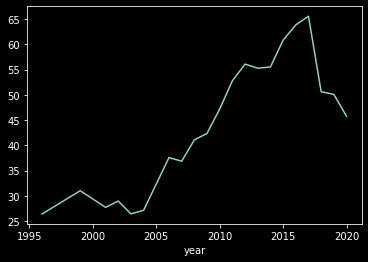

In [71]:
test.groupby('year')['mpg'].mean().plot()


In [72]:
# примерно после 2017 года, возможно, стали выпускать авто с большими объемами движков
# проверим
test.groupby('year')[['engineSize', 'mpg']].agg(['count', 'mean'])

engineSize             mpg           
          count      mean count       mean
year                                      
1996          1  2.800000     1  26.400000
1999          1  2.800000     1  31.000000
2001          1  3.000000     1  27.700000
2002          2  2.200000     2  28.950000
2003          1  3.000000     1  26.400000
2004          4  2.775000     4  27.125000
2006          3  1.866667     3  37.566667
2007          2  2.500000     2  36.850000
2008          4  2.625000     4  41.075000
2009          6  2.416667     6  42.366667
2010          3  2.800000     3  47.200000
2011         12  2.208333    12  52.791667
2012         28  2.042857    28  56.100000
2013         73  2.123288    73  55.279452
2014         97  2.181443    97  55.529897
2015        179  2.277095   179  60.846927
2016        360  2.131389   360  63.877222
2017        330  2.180303   330  65.586667
2018        168  2.225000   168  50.624405
2019        726  2.147521   726  50.093113
2020        156  2.227564   156  45.766026

In [73]:
test[(test['year'] >= 2018) & (test['engineSize'] >= 3.0)][['year', 'engineSize']]

,year,engineSize
4984,2019,3.0
8113,2018,3.0
4149,2020,3.0
8524,2019,3.0
4622,2019,3.0
...,...,...
7061,2018,4.4
6501,2019,3.0
4185,2019,3.0
6004,2019,3.0


In [74]:
len(test[test['year'] >= 2018])
# из 1050 машин, выпущенных в 2018 и позднее
# 252 имеют двигатель от 3х литров и объемнее (>1/4)

1050

In [75]:
# фича engineSize
# по ней уже сделаны выводы, но нужно проверить
# сгруппируем непрерывную переменную
test['engine_size_group'] = pd.cut(test['engineSize'], [-float('inf'),1,1.5,2,float('inf')])

In [76]:
display_error('engine_size_group')

,engine_size_group,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,"(-inf, 1.0]",8,1372.906768,209.801670,-120.308184,1493.214952
1,"(1.0, 1.5]",278,1073.740896,76.017388,-419.474055,1493.214952
2,"(1.5, 2.0]",1347,1381.761579,32.297028,-111.453373,1493.214952
3,"(2.0, inf]",524,2004.100345,197.056193,510.885394,1493.214952


In [77]:
# догадка о больших объемах двигателя подтвердилась
# чем больше объем, тем больше ошибка
# как раз дорогие и новые авто

In [78]:
# фича model
display_error(test['model']) # плохо предсказывает цену для дорогих моделей

,model,error_abs_count,error_abs_mean,error_mean,mean_error_dif,mean_error
0,1 Series,381,1146.891576,47.510529,-346.323376,1493.214952
1,2 Series,237,1374.974117,243.272226,-118.240835,1493.214952
2,3 Series,499,1328.460512,92.894746,-164.754440,1493.214952
3,4 Series,203,1727.059156,40.144698,233.844204,1493.214952
4,5 Series,216,1510.474456,76.692670,17.259504,1493.214952
5,6 Series,17,1836.807298,310.888303,343.592346,1493.214952
6,7 Series,19,2658.552948,-1791.836524,1165.337996,1493.214952
7,8 Series,4,2405.406848,-1840.550434,912.191896,1493.214952
8,M2,10,3172.254335,2990.266776,1679.039383,1493.214952
9,M3,5,2537.534177,1245.196638,1044.319225,1493.214952


# Важность признаков - Feature importance

In [79]:
# в catboost из коробки есть функционал, позволяющий понять важность признаков
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,year,27.676956
1,model,18.004037
2,engineSize,17.741936
3,mpg,14.565683
4,mileage,12.989370
5,fuelType,4.840961
6,transmission,3.354345
7,tax,0.826711


Важность считается так:
- фиксируются все фичи, кроме одной
- оценивается поведение модели при ее изменении

По итогу можно избавиться от ненужных фичей, что упростит поддержку модели

# SHAP
Интерпретируем модель

Какой вклад вносит каждая фича в образование предикта

In [80]:
! pip install shap
import shap
shap.initjs() # java для красивой визуализации

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [82]:
pd.DataFrame(shap_values, columns=X) # видим вклад каждой фичи в финальный предикт

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,9019.665494,5283.858324,1329.876897,3960.824469,2348.516319,125.026242,6428.612423,5385.952654
1,-592.104626,483.729975,1168.494573,323.074379,221.600199,30.656064,-861.916155,-835.746437
2,-2678.742036,-2149.623151,24.341617,-3979.490921,-761.312498,-63.265833,814.654823,-783.003382
3,-3227.308848,4793.949794,1101.492209,3764.740355,-578.813190,-339.687430,6852.988004,-2451.186935
4,-6.961654,6814.912451,973.786426,5858.300872,-1331.062969,8.782735,754.585556,-1234.181227
...,...,...,...,...,...,...,...,...
2152,-1679.430098,-3634.556200,0.806093,-5177.600316,329.005968,15.218740,-503.093122,2414.881191
2153,-1028.943115,4425.565450,414.009683,1569.201855,-1279.243549,92.526258,236.767251,3701.090366
2154,824.962528,3861.150246,205.380486,3542.282251,823.438384,178.948457,-901.896402,-1088.652612
2155,-1543.767217,-1929.708136,253.677351,-4094.333956,1166.786857,-743.673778,-1211.966008,-605.306858


In [83]:
# базовое значение формируется как стреднее по трейну
train['price'].mean()
# а в таблице видим сколько прибавила каждая фича к этой базе

22768.483920841063

In [84]:
# одна строчка из shap_values и одна из теста
shap.initjs() # java для красивой визуализации
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])


In [85]:
# модель дала много баллов в цену за X6
# за большой расход
# за объемный движок
# за поздний год выпуска ->2019 и тд

# ТОП-10 ошибок

In [86]:
# dataframe для shap_values
shap_df = pd.DataFrame(shap_values, columns='shap_'+X) 

In [87]:
# соединим датафреймы фичей и шапов по вертикали
test_shap = pd.concat([test.reset_index(), shap_df], axis=1)

In [88]:
pd.options.display.max_columns=100 # если не влезает таблица
test_shap = test_shap.sort_values('error_abs', ascending=False).head(10)
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,pred_full_price,error,error_abs,price_group,year_group,mileage_group,tax_group,mpg_group,engine_size_group,shap_model,shap_year,shap_transmission,shap_mileage,shap_fuelType,shap_tax,shap_mpg,shap_engineSize
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32231.178149,32231.283474,32644.201025,20649.201025,20649.201025,"(1199.999, 13995.0]","(2018.0, inf]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]",-3227.308848,4793.949794,1101.492209,3764.740355,-578.813190,-339.687430,6852.988004,-2451.186935
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,32231.178149,31437.296159,30888.114137,-16661.885863,16661.885863,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",-98.933599,5158.053287,933.530380,4166.104385,53.513353,189.054795,-1188.641539,-1052.593992
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,27668.060699,31302.083156,31073.083071,-13906.916929,13906.916929,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",3164.018972,2777.264227,960.020352,4881.719705,-198.980943,191.986912,-1619.186750,-1811.786471
1769,6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,32231.178149,29890.802992,28661.438536,-13833.561464,13833.561464,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]",-62.601070,4369.667409,917.331436,2791.534569,160.350296,-288.364803,-908.962751,-1045.543615
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,32231.178149,28194.237074,28702.280809,-13817.719191,13817.719191,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(64.2, 470.8]","(1.5, 2.0]",-113.424162,4993.721525,838.419886,4112.974870,-266.973960,189.210597,-2628.230768,-1151.444246
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,72538.786735,84788.344530,83739.449338,12744.449338,12744.449338,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",13177.050370,4940.417797,2271.013579,8280.928500,-1126.546543,251.374246,23543.100195,9674.084129
829,4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,43991.055403,47018.145998,46173.976945,-12488.023055,12488.023055,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",5770.619388,3852.454888,655.666384,4094.054287,-2777.943437,52.713800,8449.104496,3349.280072
1642,5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,28392.877556,27228.118489,27117.463710,-11332.536290,11332.536290,"(29990.0, 74990.0]","(2018.0, inf]","(9825.4, 24299.0]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",1207.022364,4567.590071,312.785100,-13.224433,554.809994,246.577355,-1509.149861,-976.973946
1696,6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,50871.295228,49047.964490,48773.303064,-11225.696936,11225.696936,"(29990.0, 74990.0]","(2018.0, inf]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(2.0, inf]",7150.021069,4447.107992,1571.105865,3332.901922,-3695.336042,-427.638842,10365.791187,3301.322847
1628,5281,5 Series,2019,39999,Semi-Auto,5877,Diesel,145,60.1,2.0,27668.060699,29561.391628,29622.406007,-10376.593993,10376.593993,"(29990.0, 74990.0]","(2018.0, inf]","(4063.2, 9825.4]","(125.0, 145.0]","(55.4, 64.2]","(1.5, 2.0]",1204.890630,4036.453584,961.515590,2052.336741,612.337304,265.194873,-1191.835743,-1046.514038


In [89]:
# построим shap-график для самой большой ошибки - она в первой строке датафрейма test_shap
shap.initjs() # java для красивой визуализации
shap.force_plot(explainer.expected_value, test_shap[shap_df.columns].values[0,:], test_shap[X].iloc[0,:])
# тут можно .values, а можно .iloc

In [90]:
train[train['model'] == '1 Series']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [91]:
train['model'].values # видим пробелы при заполнении текстового поля модели

array([' X6', ' X2', ' X2', ..., ' X2', ' X1', ' 1 Series'], dtype=object)

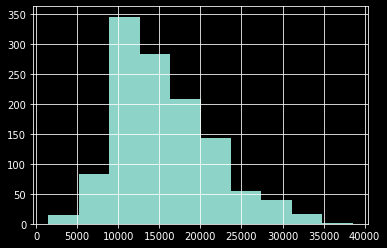

In [92]:
train[train['model'] == ' 1 Series']['price'].hist() # распределение цены для первой модели

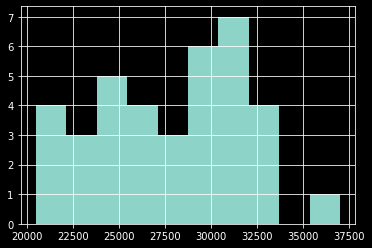

In [93]:
# Возможно, цена для 2020 года слишком низкая
# проверим
train[(train['model'] == ' 1 Series') & (train['year'] == 2020)]['price'].hist()

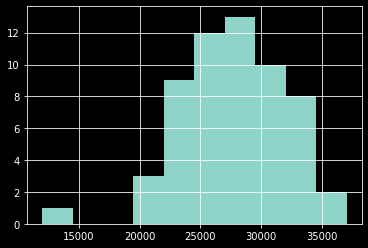

In [94]:
# видим, что цен ниже 20000 нет
# это означает,что эта машина - выброс
df[(df['model'] == ' 1 Series') & (df['year'] == 2020)]['price'].hist()


In [95]:
# вот во всем датасете мы видим эту машину как выброс
# если цена обоснована, например, битая машина,
# тогда у нас нет необходимых фичей для оценки этого свойства

Shap позволяет визуализировать несколько наблюдений

In [96]:
shap.initjs() # java для красивой визуализации
shap.force_plot(explainer.expected_value, 
                test_shap[shap_df.columns].head(10).values, 
                test_shap[X].head(10))

Визуализация shap-a 

Dependence plot

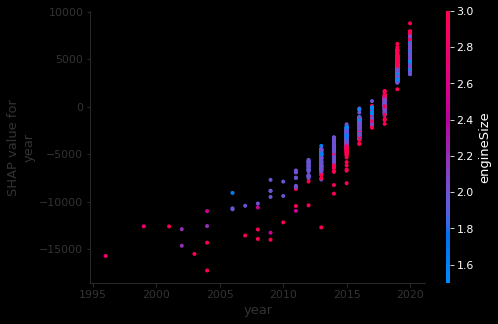

In [97]:
# зависимость предсказания от года
shap.dependence_plot("year", shap_values, test[X])

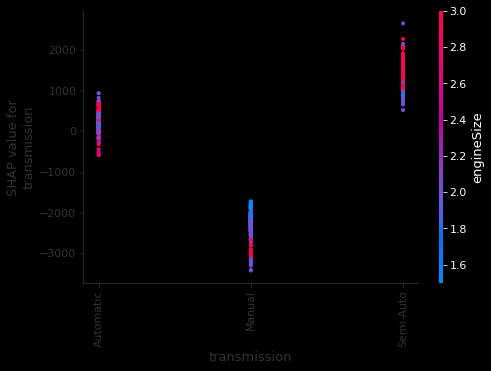

In [98]:
# зависимость предсказания от трансмиссии
shap.dependence_plot("transmission", shap_values, test[X])

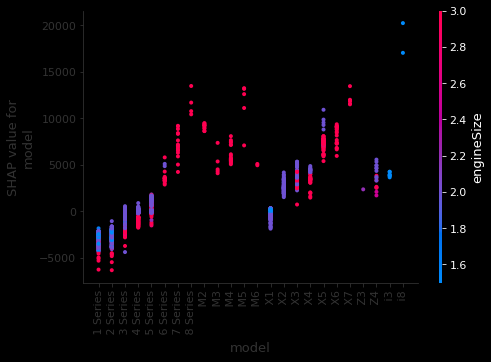

In [99]:
# зависимость предсказания от модели
shap.dependence_plot("model", shap_values, test[X])

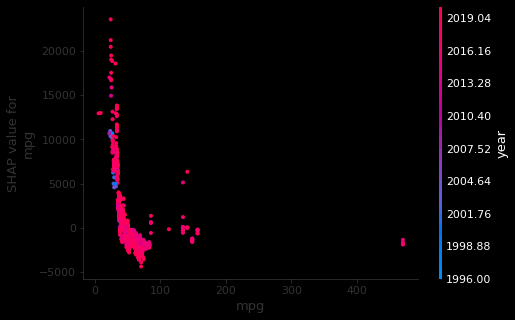

In [100]:
# зависимость предсказания от года
shap.dependence_plot("mpg", shap_values, test[X])

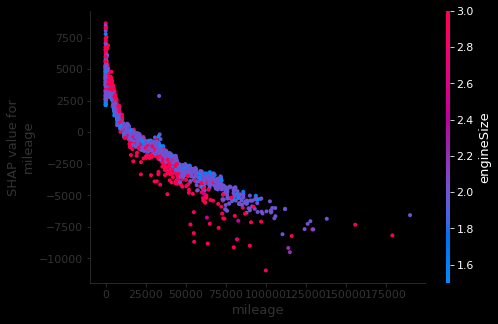

In [101]:
# зависимость предсказания от пробега
shap.dependence_plot("mileage", shap_values, test[X])

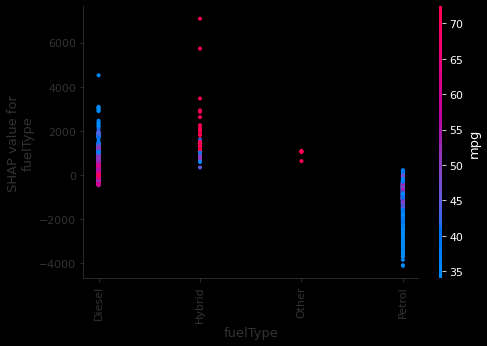

In [102]:
# зависимость предсказания от типа топлива
shap.dependence_plot("fuelType", shap_values, test[X])

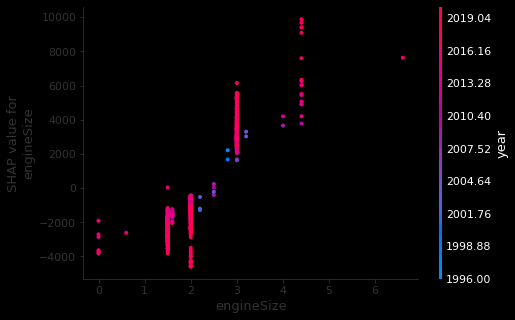

In [103]:
# зависимость предсказания от объема двигателя
shap.dependence_plot("engineSize", shap_values, test[X])

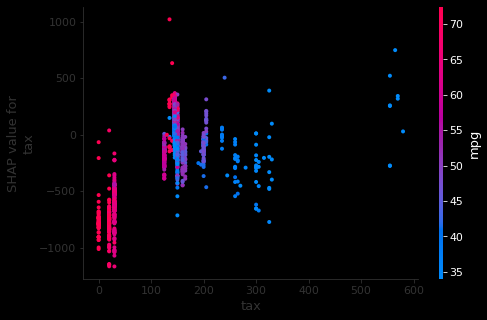

In [104]:
# зависимость предсказания от объема налога
shap.dependence_plot("tax", shap_values, test[X])

# Summary plot
Влияние переменных на аутпут модели

По категориальным не строится

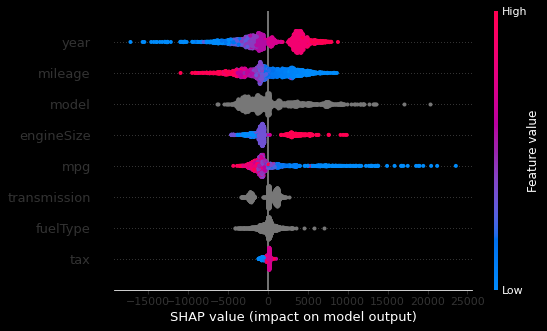

In [105]:
shap.summary_plot(shap_values, test[X])